## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Nearest Neighbor Classifier on MNIST

In [4]:
import scipy.io as sio
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from tqdm import tqdm

In [5]:
MnistTrainX = sio.loadmat ('../../datasets/mnist/MnistTrainX')['MnistTrainX'] / 255;
MnistTrainY = sio.loadmat ('../../datasets/mnist/MnistTrainY')['MnistTrainY'];
MnistTestX  = sio.loadmat ('../../datasets/mnist/MnistTestX')['MnistTestX'] / 255;
MnistTestY  = sio.loadmat ('../../datasets/mnist/MnistTestY')['MnistTestY'];

In [6]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [39]:
def NearestNeighbor (XTrain, yTrain, XTest, yTest):
    score = 0
    #for n in tqdm(range(XTest.shape[0])):
    nearestNeighbor = np.zeros(yTest.shape[0], dtype=int)
    for n in range(XTest.shape[0]):
        x = XTest[n,:]
        x = np.array(x,dtype=float, ndmin = 2)
        xrepeated = np.repeat(x, XTrain.shape[0], axis = 0)
        d = XTrain - xrepeated
        d **= 2
        d = np.sum(d, axis = 1)
        idx = np.argmin(d)
        nearestNeighbor[n] = idx
        #plt.imshow(np.reshape(x,[28,28]))
        #plt.show()
        #plt.imshow(np.reshape(XTrain[idx,:],[28,28]))
        #plt.show()

    return nearestNeighbor

In [47]:
NTest = 20
XTrain = MnistTrainX 
yTrain = MnistTrainY
XTest  = MnistTestX[0:NTest,:]
yTest = MnistTestY[0:NTest]

In [48]:
nearestNeighbor = NearestNeighbor (XTrain, yTrain, XTest, yTest)

In [49]:
print (nearestNeighbor)

[53843 28882 58741 29044 52920 30809 18279 41982 52896  5044 49939 36036
 55477 32899 39152 18418 25215 53483 29246 55328]


In [50]:
rows = 2
cols = NTest
img = np.zeros([rows*29,cols*29])

for n in range (NTest):
    img[0:28,n*29:(n+1)*29-1] = np.reshape(XTest[n,:], [28,28])
    idx = nearestNeighbor[n]
    print (idx)
    img[29:29+28,n*29:(n+1)*29-1] = np.reshape(XTrain[idx,:], [28,28])

53843
28882
58741
29044
52920
30809
18279
41982
52896
5044
49939
36036
55477
32899
39152
18418
25215
53483
29246
55328


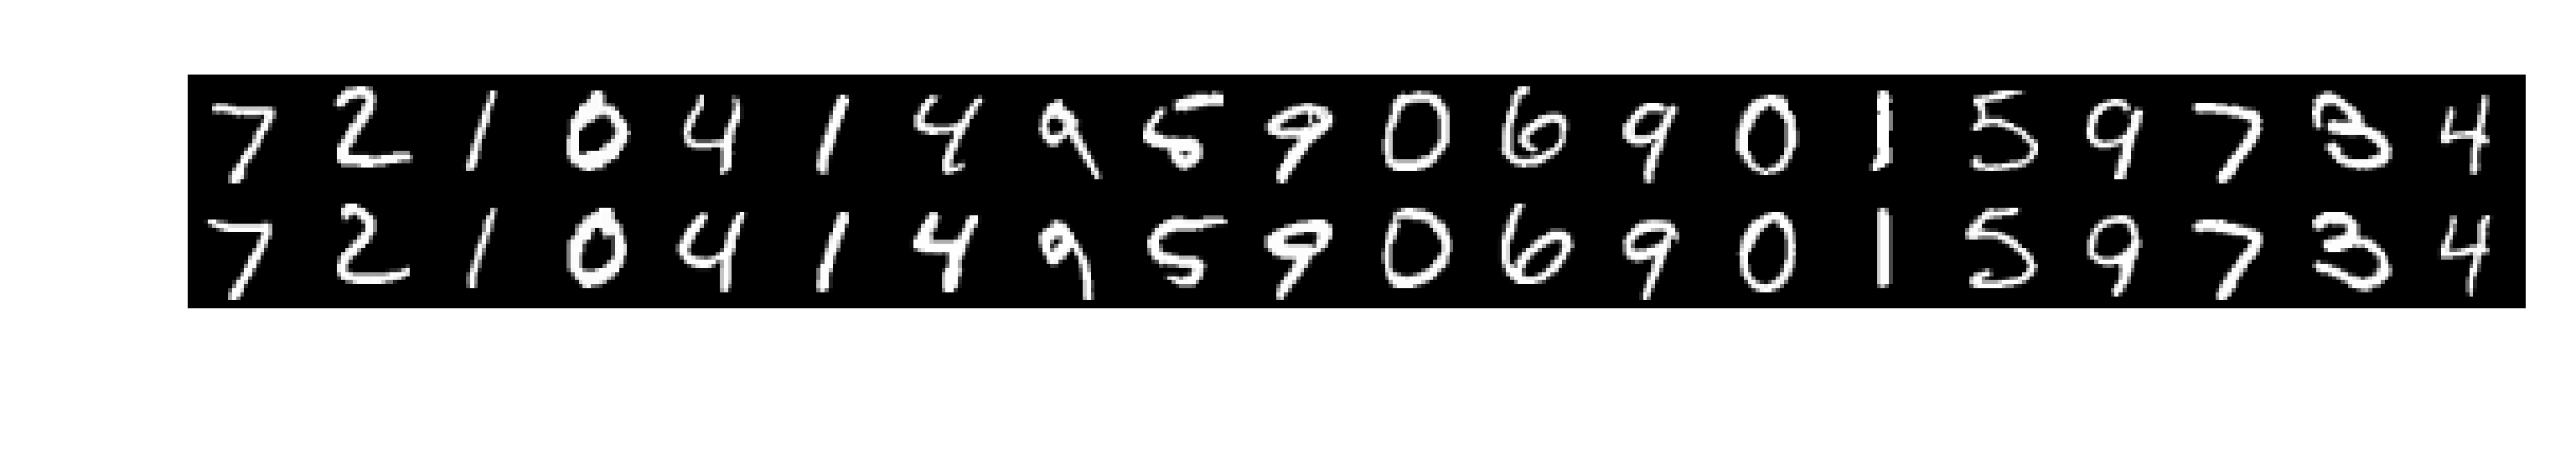

In [52]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()